<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/lsb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gambar asli:


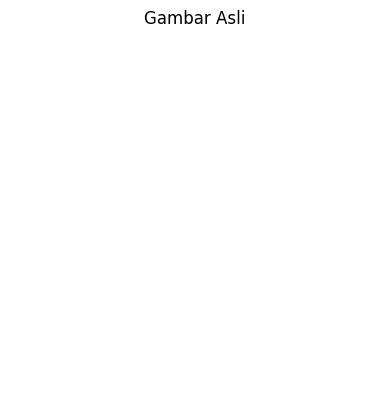

Nilai RGB dari gambar sebelum LSB:
Koordinat: (0, 0) - R: 255, G: 255, B: 255
Koordinat: (0, 1) - R: 255, G: 255, B: 255
Koordinat: (0, 2) - R: 255, G: 255, B: 255
Koordinat: (1, 0) - R: 255, G: 255, B: 255
Koordinat: (1, 1) - R: 255, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 255, B: 255
Koordinat: (2, 0) - R: 255, G: 255, B: 255
Koordinat: (2, 1) - R: 255, G: 255, B: 255
Koordinat: (2, 2) - R: 255, G: 255, B: 255
Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Gambar setelah LSB (dengan pesan):


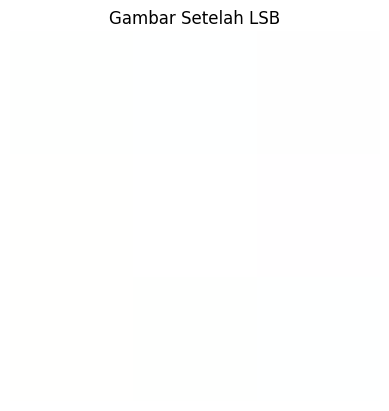

Nilai RGB dari gambar setelah LSB:
Koordinat: (0, 0) - R: 254, G: 255, B: 254
Koordinat: (0, 1) - R: 254, G: 255, B: 255
Koordinat: (0, 2) - R: 254, G: 254, B: 254
Koordinat: (1, 0) - R: 255, G: 255, B: 254
Koordinat: (1, 1) - R: 255, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 254, B: 255
Koordinat: (2, 0) - R: 255, G: 255, B: 254
Koordinat: (2, 1) - R: 254, G: 255, B: 254
Koordinat: (2, 2) - R: 254, G: 255, B: 255
Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
Pesan yang diekstrak dari gambar: Lor


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengubah pesan ke dalam bentuk bit
def message_to_bits(message):
    bits = ''.join([format(ord(char), '08b') for char in message])
    return bits

# Fungsi untuk menyisipkan pesan ke dalam gambar (LSB)
def embed_message(image, message):
    # Konversi pesan ke dalam bit
    message_bits = message_to_bits(message)
    message_bits += '11111111'  # Penanda akhir pesan (delimiter)

    img_data = np.array(image)
    h, w, _ = img_data.shape

    bit_idx = 0
    total_bits = len(message_bits)

    for i in range(h):
        for j in range(w):
            pixel = img_data[i, j]
            for k in range(3):  # Mengiterasi RGB
                if bit_idx < total_bits:
                    # Ganti bit LSB dari nilai channel dengan bit pesan
                    pixel[k] = (pixel[k] & ~1) | int(message_bits[bit_idx])
                    bit_idx += 1
            img_data[i, j] = pixel
            if bit_idx >= total_bits:
                break
        if bit_idx >= total_bits:
            break

    return Image.fromarray(img_data)

# Fungsi untuk mengekstrak pesan dari gambar
def extract_message(image):
    img_data = np.array(image)
    bits = []

    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi RGB
                bits.append(str(pixel[k] & 1))  # Ekstrak LSB dari setiap channel RGB

    # Gabungkan bit menjadi string
    bits = ''.join(bits)

    # Ambil setiap 8 bit (1 byte) dan konversikan ke karakter
    message = ''
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        char = chr(int(byte, 2))
        if char == chr(255):  # Penanda akhir pesan
            break
        message += char

    return message

# Fungsi untuk membaca bit dari gambar
def read_bits_from_image(image):
    img_data = np.array(image)
    bits = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi untuk R, G, B
                # Ambil bit LSB dari masing-masing channel (R, G, B)
                bits.append(pixel[k] & 1)  # Ambil bit paling signifikan (LSB)

    return bits

# Fungsi untuk membaca nilai RGB dari setiap piksel gambar
def read_rgb_from_image(image):
    img_data = np.array(image)
    rgb_values = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            rgb_values.append((i, j, pixel[0], pixel[1], pixel[2]))  # Simpan (x, y, R, G, B)

    return rgb_values

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()

# Contoh penggunaan
# Buat gambar 3x3 dengan warna putih
image = Image.new('RGB', (3, 3), color=(255, 255, 255))

# Tampilkan gambar asli
print("Gambar asli:")
display_image(image, "Gambar Asli")

# Baca nilai RGB dari setiap piksel sebelum LSB
rgb_values_before = read_rgb_from_image(image)
print("Nilai RGB dari gambar sebelum LSB:")
for rgb in rgb_values_before:
    print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

# Baca bit LSB dari gambar sebelum pesan disisipkan
bits_before = read_bits_from_image(image)
print("Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):")
print(bits_before)

# Pesan yang akan disisipkan
message = "Lorem"

# Sisipkan pesan ke dalam gambar menggunakan LSB
encoded_image = embed_message(image, message)

# Tampilkan gambar yang telah disisipi pesan
print("Gambar setelah LSB (dengan pesan):")
display_image(encoded_image, "Gambar Setelah LSB")

# Baca nilai RGB dari setiap piksel setelah LSB
rgb_values_after = read_rgb_from_image(encoded_image)
print("Nilai RGB dari gambar setelah LSB:")
for rgb in rgb_values_after:
    print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

# Baca bit LSB dari gambar yang telah disisipi pesan
bits_after = read_bits_from_image(encoded_image)
print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
print(bits_after)

# Ekstrak pesan dari gambar yang telah disisipi pesan
extracted_message = extract_message(encoded_image)
print("Pesan yang diekstrak dari gambar:", extracted_message)

In [2]:
len(bits_before)

27

In [3]:
def string_to_bits(s):
    # Mengonversi setiap karakter dalam string menjadi representasi biner 8-bit
    bits = ''.join(format(ord(c), '08b') for c in s)
    return bits

# Contoh penggunaan
string = "Hi"
bit_string = string_to_bits(string)
print("String asli:", string)
print("Representasi bit:", bit_string)

String asli: Hi
Representasi bit: 0100100001101001


In [4]:
import numpy as np
from PIL import Image

# Fungsi untuk menghitung MSE (Mean Squared Error) antara dua gambar
def mse(imageA, imageB):
    # Konversi gambar ke numpy array
    img1 = np.array(imageA)
    img2 = np.array(imageB)

    # Hitung perbedaan antara dua gambar
    err = np.sum((img1.astype("float") - img2.astype("float")) ** 2)

    # Normalisasi perbedaan terhadap jumlah piksel
    errSum = err / float(img1.shape[0] * img1.shape[1] * img1.shape[2])

    return err, errSum

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio)
def psnr(imageA, imageB):
    val, mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # Jika MSE nol, maka gambar identik, dan PSNR adalah tak terhingga
    print(val, mse_value)
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

# Contoh penggunaan
# Misalkan kita memiliki dua gambar: image dan encoded_image
# Gambar asli dan gambar setelah disisipi pesan

# Hitung PSNR antara gambar asli dan gambar hasil LSB
psnr_value = psnr(image, encoded_image)
print(f"PSNR antara gambar asli dan encoded_image: {psnr_value} dB")

12.0 0.4444444444444444
PSNR antara gambar asli dan encoded_image: 51.65262878979273 dB


Gambar asli:


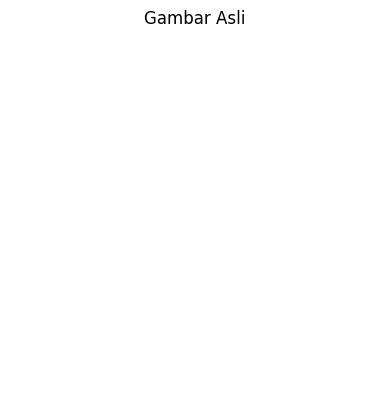

Nilai RGB dari gambar sebelum LSB:
Koordinat: (0, 0) - R: 255, G: 255, B: 255
Koordinat: (0, 1) - R: 255, G: 255, B: 255
Koordinat: (0, 2) - R: 255, G: 255, B: 255
Koordinat: (1, 0) - R: 255, G: 255, B: 255
Koordinat: (1, 1) - R: 255, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 255, B: 255
Koordinat: (2, 0) - R: 255, G: 255, B: 255
Koordinat: (2, 1) - R: 255, G: 255, B: 255
Koordinat: (2, 2) - R: 255, G: 255, B: 255
Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Pesan terlalu panjang! Gambar hanya bisa menampung 27 bit, tapi pesan membutuhkan 32 bit.


In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengubah pesan ke dalam bentuk bit
def message_to_bits(message):
    bits = ''.join([format(ord(char), '08b') for char in message])
    return bits

# Fungsi untuk menyisipkan pesan ke dalam gambar (LSB)
def embed_message(image, message):
    # Konversi pesan ke dalam bit
    message_bits = message_to_bits(message)
    message_bits += '11111111'  # Penanda akhir pesan (delimiter)

    img_data = np.array(image)
    h, w, _ = img_data.shape

    # Hitung total kapasitas gambar dalam bit
    capacity = h * w * 3  # Setiap piksel memiliki 3 channel (RGB)

    # Cek apakah panjang bit pesan melebihi kapasitas gambar
    total_bits = len(message_bits)
    if total_bits > capacity:
        raise ValueError(f"Pesan terlalu panjang! Gambar hanya bisa menampung {capacity} bit, tapi pesan membutuhkan {total_bits} bit.")

    bit_idx = 0

    for i in range(h):
        for j in range(w):
            pixel = img_data[i, j]
            for k in range(3):  # Mengiterasi RGB
                if bit_idx < total_bits:
                    # Ganti bit LSB dari nilai channel dengan bit pesan
                    pixel[k] = (pixel[k] & ~1) | int(message_bits[bit_idx])
                    bit_idx += 1
            img_data[i, j] = pixel
            if bit_idx >= total_bits:
                break
        if bit_idx >= total_bits:
            break

    return Image.fromarray(img_data)

# Fungsi untuk mengekstrak pesan dari gambar
def extract_message(image):
    img_data = np.array(image)
    bits = []

    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi RGB
                bits.append(str(pixel[k] & 1))  # Ekstrak LSB dari setiap channel RGB

    # Gabungkan bit menjadi string
    bits = ''.join(bits)

    # Ambil setiap 8 bit (1 byte) dan konversikan ke karakter
    message = ''
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        char = chr(int(byte, 2))
        if char == chr(255):  # Penanda akhir pesan
            break
        message += char

    return message

# Fungsi untuk membaca bit dari gambar
def read_bits_from_image(image):
    img_data = np.array(image)
    bits = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi untuk R, G, B
                # Ambil bit LSB dari masing-masing channel (R, G, B)
                bits.append(pixel[k] & 1)  # Ambil bit paling signifikan (LSB)

    return bits

# Fungsi untuk membaca nilai RGB dari setiap piksel gambar
def read_rgb_from_image(image):
    img_data = np.array(image)
    rgb_values = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            rgb_values.append((i, j, pixel[0], pixel[1], pixel[2]))  # Simpan (x, y, R, G, B)

    return rgb_values

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()

# Contoh penggunaan
# Buat gambar 3x3 dengan warna putih
image = Image.new('RGB', (3, 3), color=(255, 255, 255))

# Tampilkan gambar asli
print("Gambar asli:")
display_image(image, "Gambar Asli")

# Baca nilai RGB dari setiap piksel sebelum LSB
rgb_values_before = read_rgb_from_image(image)
print("Nilai RGB dari gambar sebelum LSB:")
for rgb in rgb_values_before:
    print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

# Baca bit LSB dari gambar sebelum pesan disisipkan
bits_before = read_bits_from_image(image)
print("Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):")
print(bits_before)

# Pesan yang akan disisipkan
message = "Lor"

# Sisipkan pesan ke dalam gambar menggunakan LSB
try:
    encoded_image = embed_message(image, message)
    # Tampilkan gambar yang telah disisipi pesan
    print("Gambar setelah LSB (dengan pesan):")
    display_image(encoded_image, "Gambar Setelah LSB")

    # Baca nilai RGB dari setiap piksel setelah LSB
    rgb_values_after = read_rgb_from_image(encoded_image)
    print("Nilai RGB dari gambar setelah LSB:")
    for rgb in rgb_values_after:
        print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

    # Baca bit LSB dari gambar yang telah disisipi pesan
    bits_after = read_bits_from_image(encoded_image)
    print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
    print(bits_after)

    # Ekstrak pesan dari gambar yang telah disisipi pesan
    extracted_message = extract_message(encoded_image)
    print("Pesan yang diekstrak dari gambar:", extracted_message)

except ValueError as e:
    print(e)


In [6]:
len(bits_before)

27

Gambar asli:


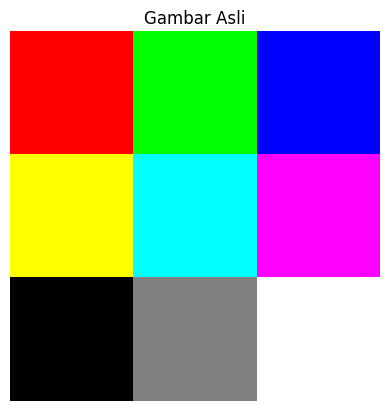

Nilai RGB dari gambar sebelum LSB:
Koordinat: (0, 0) - R: 255, G: 0, B: 0
Koordinat: (0, 1) - R: 0, G: 255, B: 0
Koordinat: (0, 2) - R: 0, G: 0, B: 255
Koordinat: (1, 0) - R: 255, G: 255, B: 0
Koordinat: (1, 1) - R: 0, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 0, B: 255
Koordinat: (2, 0) - R: 0, G: 0, B: 0
Koordinat: (2, 1) - R: 128, G: 128, B: 128
Koordinat: (2, 2) - R: 255, G: 255, B: 255
Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):
[1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Gambar setelah LSB (dengan pesan):


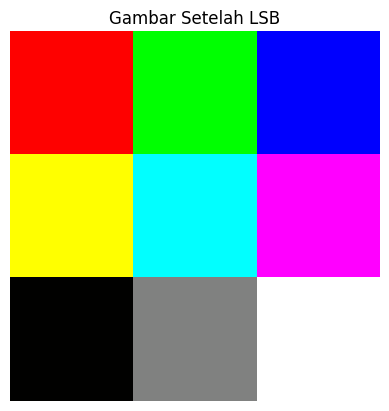

Nilai RGB dari gambar setelah LSB:
Koordinat: (0, 0) - R: 254, G: 1, B: 0
Koordinat: (0, 1) - R: 0, G: 255, B: 1
Koordinat: (0, 2) - R: 0, G: 0, B: 254
Koordinat: (1, 0) - R: 255, G: 255, B: 0
Koordinat: (1, 1) - R: 1, G: 255, B: 255
Koordinat: (1, 2) - R: 255, G: 0, B: 255
Koordinat: (2, 0) - R: 1, G: 1, B: 0
Koordinat: (2, 1) - R: 128, G: 129, B: 128
Koordinat: (2, 2) - R: 255, G: 255, B: 255
Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
Pesan yang diekstrak dari gambar: Lor


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengubah pesan ke dalam bentuk bit
def message_to_bits(message):
    bits = ''.join([format(ord(char), '08b') for char in message if ord(char) < 256])  # Hanya karakter ASCII
    return bits


# Fungsi untuk menyisipkan pesan ke dalam gambar (LSB)
def embed_message(image, message):
    # Konversi pesan ke dalam bit
    message_bits = message_to_bits(message)

    img_data = np.array(image)
    h, w, _ = img_data.shape

    # Hitung total kapasitas gambar dalam bit
    capacity = h * w * 3  # Setiap piksel memiliki 3 channel (RGB)

    # Cek apakah panjang bit pesan melebihi kapasitas gambar
    total_bits = len(message_bits)
    if total_bits > capacity:
        raise ValueError(f"Pesan terlalu panjang! Gambar hanya bisa menampung {capacity} bit, tapi pesan membutuhkan {total_bits} bit.")

    bit_idx = 0

    for i in range(h):
        for j in range(w):
            pixel = img_data[i, j]
            for k in range(3):  # Mengiterasi RGB
                if bit_idx < total_bits:
                    # Ganti bit LSB dari nilai channel dengan bit pesan
                    pixel[k] = (pixel[k] & ~1) | int(message_bits[bit_idx])
                    bit_idx += 1
            img_data[i, j] = pixel
            if bit_idx >= total_bits:
                break
        if bit_idx >= total_bits:
            break

    return Image.fromarray(img_data)

# Fungsi untuk mengekstrak pesan dari gambar
def extract_message(image, message_length):
    img_data = np.array(image)
    bits = []

    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi RGB
                bits.append(str(pixel[k] & 1))  # Ekstrak LSB dari setiap channel RGB

    # Gabungkan bit menjadi string
    bits = ''.join(bits)

    # Ambil setiap 8 bit (1 byte) dan konversikan ke karakter
    message = ''
    for i in range(0, message_length * 8, 8):
        byte = bits[i:i+8]
        char = chr(int(byte, 2))
        message += char

    return message

# Fungsi untuk membaca bit dari gambar
def read_bits_from_image(image):
    img_data = np.array(image)
    bits = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi untuk R, G, B
                # Ambil bit LSB dari masing-masing channel (R, G, B)
                bits.append(pixel[k] & 1)  # Ambil bit paling signifikan (LSB)

    return bits

# Fungsi untuk membaca nilai RGB dari setiap piksel gambar
def read_rgb_from_image(image):
    img_data = np.array(image)
    rgb_values = []

    # Iterasi setiap piksel dalam gambar
    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            rgb_values.append((i, j, pixel[0], pixel[1], pixel[2]))  # Simpan (x, y, R, G, B)

    return rgb_values

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()

# Contoh penggunaan
# Buat gambar 3x3 dengan warna putih
image = Image.new('RGB', (3, 3), color=(255, 255, 255))

# Define RGB values for each pixel (3x3 grid)
pixels = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255),   # Red, Green, Blue
    (255, 255, 0), (0, 255, 255), (255, 0, 255), # Yellow, Cyan, Magenta
    (0, 0, 0), (128, 128, 128), (255, 255, 255) # Black, Gray, White
]

# Update the image with these pixel values
image.putdata(pixels)

# Tampilkan gambar asli
print("Gambar asli:")
display_image(image, "Gambar Asli")

# Baca nilai RGB dari setiap piksel sebelum LSB
rgb_values_before = read_rgb_from_image(image)
print("Nilai RGB dari gambar sebelum LSB:")
for rgb in rgb_values_before:
    print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

# Baca bit LSB dari gambar sebelum pesan disisipkan
bits_before = read_bits_from_image(image)
print("Bit yang dibaca dari gambar sebelum LSB (LSB dari tiap channel):")
print(bits_before)

# Pesan yang akan disisipkan
message = "Lor"

# Sisipkan pesan ke dalam gambar menggunakan LSB
try:
    encoded_image = embed_message(image, message)
    # Tampilkan gambar yang telah disisipi pesan
    print("Gambar setelah LSB (dengan pesan):")
    display_image(encoded_image, "Gambar Setelah LSB")

    # Baca nilai RGB dari setiap piksel setelah LSB
    rgb_values_after = read_rgb_from_image(encoded_image)
    print("Nilai RGB dari gambar setelah LSB:")
    for rgb in rgb_values_after:
        print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

    # Baca bit LSB dari gambar yang telah disisipi pesan
    bits_after = read_bits_from_image(encoded_image)
    print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
    print(bits_after)

    # Ekstrak pesan dari gambar yang telah disisipi pesan
    extracted_message = extract_message(encoded_image, len(message))
    print("Pesan yang diekstrak dari gambar:", extracted_message)

except ValueError as e:
    print(e)


In [8]:
import time
import lzma

data = b'lorem ipsum dolor sit amet' * 10

print(f'Original data size {len(data)}')

start = time.time()

compressed_data_lzma = lzma.compress(data)

print(f'Compressed data size {len(compressed_data_lzma)}')

end = time.time()

print(f'Compressed in {end - start} seconds')

Original data size 260
Compressed data size 96
Compressed in 0.016038179397583008 seconds


In [9]:
data

b'lorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit amet'

In [10]:
compressed_data_lzma

b'\xfd7zXZ\x00\x00\x04\xe6\xd6\xb4F\x02\x00!\x01\x16\x00\x00\x00t/\xe5\xa3\xe0\x01\x03\x00 ]\x006\x1b\xca\xaa\xe8\n67z\xd6\x07\xef\\\xcaj\xc3M\t\r^s\x84\xa1=\x8e\xb4\x93\x8b\xd5\xdc\x00\x00\x00\xfa\xa5\x1a\xda\x8a\xb4\xe9\xc0\x00\x01<\x84\x02\x00\x00\x00\xd2\xcd\x82^\xb1\xc4g\xfb\x02\x00\x00\x00\x00\x04YZ'

In [11]:
import time
import lzma

# Data asli yang berupa string (diubah menjadi byte string untuk dikompresi)
content = 'lorem ipsum dolor sit amet' * 10
data = content.encode()

# Ukuran data asli
print(f'Original data size: {len(data)} bytes')

# Waktu mulai kompresi
start = time.time()

# Kompresi data
compressed_data_lzma = lzma.compress(data)

# Ukuran data setelah kompresi
print(f'Compressed data size: {len(compressed_data_lzma)} bytes')

# Waktu akhir kompresi
end = time.time()

# Waktu yang diperlukan untuk kompresi
print(f'Compressed in {end - start} seconds')

# Dekompresi data yang telah dikompresi
decompressed_data = lzma.decompress(compressed_data_lzma)

# Konversi byte data yang didekompresi kembali menjadi string
text = decompressed_data.decode()

# Cetak hasil dekompresi (teks asli)
print("Decompressed data (as text):")
print(text)

Original data size: 260 bytes
Compressed data size: 96 bytes
Compressed in 0.01781296730041504 seconds
Decompressed data (as text):
lorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit amet


In [12]:
content == text

True

In [13]:
content_data_as_int = int.from_bytes(content.encode(), byteorder='big')
content_data_as_bits = bin(content_data_as_int)

content_data_as_int, content_data_as_bits

(58792490612519670758805604418886682211440408333286278126758637131065502144792427816599105124215802447961350486374200054433251987124032215662485052341760840670924155071514733761062562034288382089761713425263652091766096689413296097616408359999043325772300728031597783013010719492340061175813872652955925556482173008164907739049908445859698559559506723762348489302896932078201496345768008555630383132318265984749653337973300418280930520157950077217429358987807802833693074982558698670754296888622800394676144841334520110220326264559777214390917672411753731910098202989064035363787575874254858671684325513290947010773198811522420,
 '0b1101100011011110111001001100101011011010010000001101001011100000111001101110101011011010010000001100100011011110110110001101111011100100010000001110011011010010111010000100000011000010110110101100101011101000110110001101111011100100110010101101101001000000110100101110000011100110111010101101101001000000110010001101111011011000110111101110010001000000111001101101001

In [14]:
# Tampilkan compressed_data_lzma sebagai integer
compressed_data_as_int = int.from_bytes(compressed_data_lzma, byteorder='big')

# Tampilkan compressed_data_lzma sebagai bit (biner)
compressed_data_as_bits = bin(compressed_data_as_int)

compressed_data_as_int, compressed_data_as_bits

(1535638767427377762028063218566954999062587639768487114177309335927008794791641950441717326423510357472032254931421929814062870891891603573636754774697719932481582758366849321474052654211745689119570526985457713243907944054014630234,
 '0b11111101001101110111101001011000010110100000000000000000000001001110011011010110101101000100011000000010000000000010000100000001000101100000000000000000000000000111010000101111111001011010001111100000000000010000001100000000001000000101110100000000001101100001101111001010101010101110100000001010001101100011011101111010110101100000011111101111010111001100101001101010110000110100110100001001000011010101111001110011100001001010000100111101100011101011010010010011100010111101010111011100000000000000000000000000111110101010010100011010110110101000101010110100111010011100000000000000000000010011110010000100000000100000000000000000000000001101001011001101100000100101111010110001110001000110011111111011000000100000000000000000000000000000000000000100010110010

In [15]:
compressed_data_lzma.decode('latin-1')

'ý7zXZ\x00\x00\x04æÖ´F\x02\x00!\x01\x16\x00\x00\x00t/å£à\x01\x03\x00 ]\x006\x1bÊªè\n67zÖ\x07ï\\ÊjÃM\t\r^s\x84¡=\x8e´\x93\x8bÕÜ\x00\x00\x00ú¥\x1aÚ\x8a´éÀ\x00\x01<\x84\x02\x00\x00\x00ÒÍ\x82^±Ägû\x02\x00\x00\x00\x00\x04YZ'

In [16]:
decompressed_data.decode('latin-1')

'lorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit amet'

In [17]:
len(content_data_as_bits), len(compressed_data_as_bits)

(2081, 770)

In [18]:
# Fungsi untuk mengonversi ciphertext ke bit
def points_to_bits(ciphertext):
    bits = ''
    for point1, point2 in ciphertext:
        # Ubah masing-masing koordinat dari point1 (x, y) menjadi biner
        bits += f'{point1[0]:020b}'  # Gunakan 20 bit untuk menyimpan x
        bits += f'{point1[1]:020b}'  # Gunakan 20 bit untuk menyimpan y

        # Ubah masing-masing koordinat dari point2 (x, y) menjadi biner
        bits += f'{point2[0]:020b}'  # Gunakan 20 bit untuk menyimpan x
        bits += f'{point2[1]:020b}'  # Gunakan 20 bit untuk menyimpan y
    return bits

# Fungsi untuk mengonversi bit kembali ke ciphertext (list of points)
def bits_to_points(bits):
    ciphertext = []
    for i in range(0, len(bits), 80):  # Setiap point terdiri dari 80 bit (4 angka masing-masing 20 bit)
        x1 = int(bits[i:i+20], 2)
        y1 = int(bits[i+20:i+40], 2)
        x2 = int(bits[i+40:i+60], 2)
        y2 = int(bits[i+60:i+80], 2)
        ciphertext.append(((x1, y1), (x2, y2)))
    return ciphertext

# Ciphertext yang akan diubah menjadi bit
ciphertext = [((29, 448), (637, 481)),
              ((74, 376), (474, 337)),
              ((29, 448), (737, 7)),
              ((29, 571), (876, 146)),
              ((767, 120), (753, 526))]

# Mengonversi ciphertext ke bit
ciphertext_bits = points_to_bits(ciphertext)
print(f"Ciphertext as bits: {ciphertext_bits}")

# Mengonversi bit kembali ke ciphertext
recovered_ciphertext = bits_to_points(ciphertext_bits)
print(f"Recovered ciphertext: {recovered_ciphertext}")


Ciphertext as bits: 0000000000000001110100000000000111000000000000000010011111010000000000011110000100000000000001001010000000000001011110000000000000011101101000000000000101010001000000000000000111010000000000011100000000000000001011100001000000000000000001110000000000000001110100000000001000111011000000000011011011000000000000001001001000000000001011111111000000000000011110000000000000101111000100000000001000001110
Recovered ciphertext: [((29, 448), (637, 481)), ((74, 376), (474, 337)), ((29, 448), (737, 7)), ((29, 571), (876, 146)), ((767, 120), (753, 526))]


In [19]:
type(ciphertext_bits)

str

In [20]:
# Fungsi untuk mengonversi string bit menjadi byte string dan kemudian ke char string
def bits_to_string(bits):
    # Ubah string bit menjadi byte string
    byte_string = int(bits, 2).to_bytes((len(bits) + 7) // 8, byteorder='big')
    # Konversi byte string ke char string dengan encoding latin1
    return byte_string.decode('latin-1')

# Konversi bit string ke string atau char
char_string = bits_to_string(ciphertext_bits)
char_string

"\x00\x01Ð\x01À\x00'Ð\x01á\x00\x04\xa0\x01x\x00\x1d\xa0\x01Q\x00\x01Ð\x01À\x00.\x10\x00\x07\x00\x01Ð\x02;\x006À\x00\x92\x00/ð\x00x\x00/\x10\x02\x0e"

# Lena Image

In [21]:
import requests
from PIL import Image
import io

# URL to the raw image file
url = "https://raw.githubusercontent.com/mikolalysenko/lena/master/lena.png"

# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load the image using PIL
    lena_image = Image.open(io.BytesIO(response.content))
    lena_image.show()  # Display the image (optional)
    lena_image.save("lena.png")  # Save the image locally
else:
    print("Failed to download the image.")

In [22]:
import os
LENA_IMG = 'lena.png'

if not os.path.exists(LENA_IMG):
    raise FileNotFoundError(f"Image not found at {LENA_IMG}")

In [23]:
image_lena = Image.open(LENA_IMG)

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
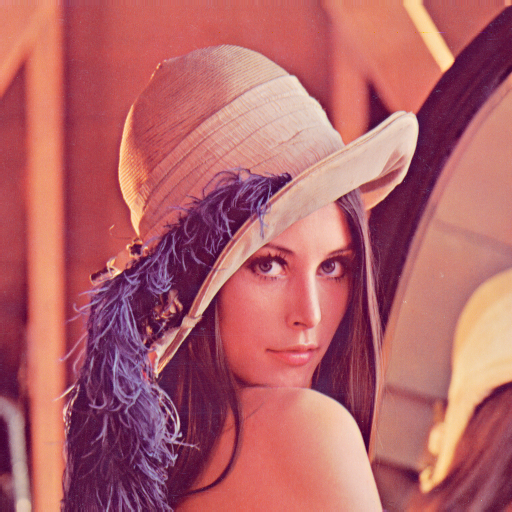

In [24]:
image_lena_data = np.array(image_lena)
image_lena_data

In [25]:
image_lena_data.shape

(512, 512, 3)

Gambar setelah LSB (dengan pesan):


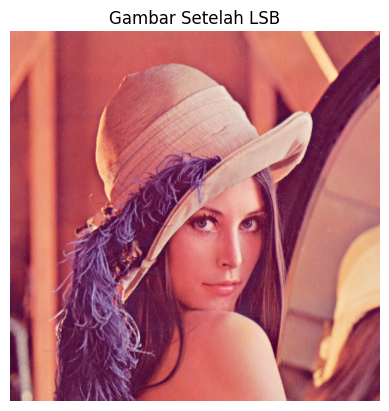

Pesan yang diekstrak dari gambar: lorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametlorem ipsum dolor sit ametH è


In [26]:
# Sisipkan pesan ke dalam gambar menggunakan LSB
message_1 = content
try:
    encoded_image_1 = embed_message(image_lena, message_1)
    # Tampilkan gambar yang telah disisipi pesan
    print("Gambar setelah LSB (dengan pesan):")
    display_image(encoded_image_1, "Gambar Setelah LSB")

    # Baca nilai RGB dari setiap piksel setelah LSB
    rgb_values_after = read_rgb_from_image(encoded_image_1)
    # print("Nilai RGB dari gambar setelah LSB:")
    # for rgb in rgb_values_after:
        # print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

    # Baca bit LSB dari gambar yang telah disisipi pesan
    bits_after = read_bits_from_image(encoded_image_1)
    # print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
    # print(bits_after)

    # Ekstrak pesan dari gambar yang telah disisipi pesan
    extracted_message = extract_message(encoded_image_1, len(message_1)+4)
    print("Pesan yang diekstrak dari gambar:", extracted_message)

except ValueError as e:
    print(e)

In [27]:
psnr_value_1 = psnr(image_lena, encoded_image_1)
print(f"PSNR antara gambar asli dan encoded_image: {psnr_value_1} dB")

1051.0 0.0013364156087239583
PSNR antara gambar asli dan encoded_image: 76.87138821510992 dB


In [28]:
extracted_message == message_1

False

Gambar setelah LSB (dengan pesan):


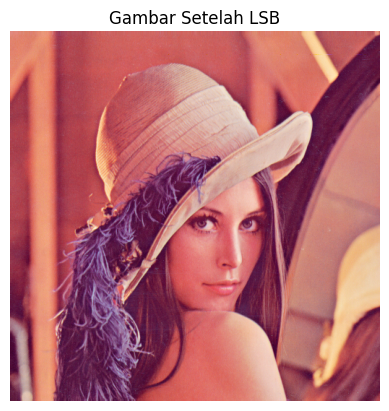

Pesan yang diekstrak dari gambar: ý7zXZ  æÖ´F !   t/å£à  ] 6Êªè
^s¡=´ÕÜ   ú¥Ú´éÀ <   ÒÍ^±Ägû    YZ


In [29]:
# Sisipkan pesan ke dalam gambar menggunakan LSB
message_2 = compressed_data_lzma.decode('latin-1')
try:
    encoded_image_2 = embed_message(image_lena, message_2)
    # Tampilkan gambar yang telah disisipi pesan
    print("Gambar setelah LSB (dengan pesan):")
    display_image(encoded_image_2, "Gambar Setelah LSB")

    # Baca nilai RGB dari setiap piksel setelah LSB
    rgb_values_after = read_rgb_from_image(encoded_image_2)
    # print("Nilai RGB dari gambar setelah LSB:")
    # for rgb in rgb_values_after:
        # print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

    # Baca bit LSB dari gambar yang telah disisipi pesan
    bits_after = read_bits_from_image(encoded_image_2)
    # print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
    # print(bits_after)

    # Ekstrak pesan dari gambar yang telah disisipi pesan
    extracted_message = extract_message(encoded_image_2, len(message_2))
    print("Pesan yang diekstrak dari gambar:", extracted_message)

except ValueError as e:
    print(e)


In [30]:
psnr_value_2 = psnr(image_lena, encoded_image_2)
print(f"PSNR antara gambar asli dan encoded_image: {psnr_value_2} dB")

414.0 0.00052642822265625
PSNR antara gambar asli dan encoded_image: 80.91741196418334 dB


In [31]:
extracted_message == message_2

True

In [32]:
print(extracted_message)

ý7zXZ  æÖ´F !   t/å£à  ] 6Êªè
^s¡=´ÕÜ   ú¥Ú´éÀ <   ÒÍ^±Ägû    YZ


Gambar setelah LSB (dengan pesan):


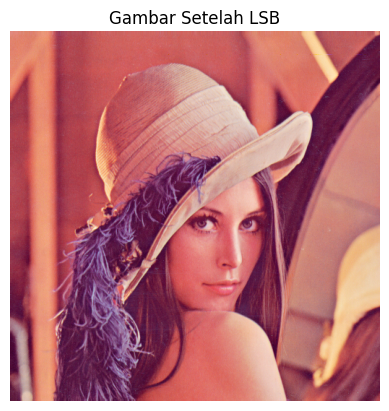

Pesan yang diekstrak dari gambar: d|&0%|0*6c#|8zc7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cqzb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q*9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c,0e8mzq700x*2cdc+z)c2**8dz7_c7|88p|{0|0_*78$*mza8+8=d(0i*m||7gza0jc/8=c\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\8l8m0e7r7m7!76*mclz58=z,d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzsHÞ


In [33]:
# Sisipkan pesan ke dalam gambar menggunakan LSB
message_3 = "dˆ|&0%|0*6c#|8zc7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cqzb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q*9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c,0e8mzq700x*2cdc+z)c2**8̃dz7_c7|88p|{0|0_*78$*mza8+8=d(0i*m||7gza0jc/8=c\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\8l8m0e7r7m7!76*mclz58=z,d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzs"
try:
    encoded_image_3 = embed_message(image_lena, message_3)
    # Tampilkan gambar yang telah disisipi pesan
    print("Gambar setelah LSB (dengan pesan):")
    display_image(encoded_image_3, "Gambar Setelah LSB")

    # Baca nilai RGB dari setiap piksel setelah LSB
    rgb_values_after = read_rgb_from_image(encoded_image_3)
    # print("Nilai RGB dari gambar setelah LSB:")
    # for rgb in rgb_values_after:
        # print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

    # Baca bit LSB dari gambar yang telah disisipi pesan
    bits_after = read_bits_from_image(encoded_image_3)
    # print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
    # print(bits_after)

    # Ekstrak pesan dari gambar yang telah disisipi pesan
    extracted_message = extract_message(encoded_image_3, len(message_3))
    print("Pesan yang diekstrak dari gambar:", extracted_message)

except ValueError as e:
    print(e)


In [34]:
psnr_value_3 = psnr(image_lena, encoded_image_3)
print(f"PSNR antara gambar asli dan encoded_image: {psnr_value_3} dB")

1436.0 0.0018259684244791667
PSNR antara gambar asli dan encoded_image: 75.51587097632952 dB


In [35]:
extracted_message.encode().hex() == message_3.encode().hex()

False

In [36]:
message_3

'dˆ|&0%|0*6c#|8zc7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cqzb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q*9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c,0e8mzq700x*2cdc+z)c2**8̃dz7_c7|88p|{0|0_*78$*mza8+8=d(0i*m||7gza0jc/8=c\\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\\8l8m0e7r7m7!76*mclz58=z,d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzs'

In [37]:
extracted_message

'd|&0%|0*6c#|8zc7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cqzb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q*9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c,0e8mzq700x*2cdc+z)c2**8dz7_c7|88p|{0|0_*78$*mza8+8=d(0i*m||7gza0jc/8=c\\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\\8l8m0e7r7m7!76*mclz58=z,d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzsHÞ'

In [38]:
for i in range(len(message_3)):
    print(f"{message_3[i]} -> {extracted_message[i]}")

d -> d
ˆ -> |
| -> &
& -> 0
0 -> %
% -> |
| -> 0
0 -> *
* -> 6
6 -> c
c -> #
# -> |
| -> 8
8 -> z
z -> c
c -> 7
7 -> c
c -> #
# -> z
z -> m
m -> 8
8 -> d
d -> *
* -> 0
0 -> *
* -> 0
0 -> 8
8 -> *
* -> 8
8 -> p
p -> 8
8 -> $
$ -> *
* -> c
c -> d
d -> ,
, -> d
d -> +
+ -> z
z -> e
e -> z
z -> ,
, -> |
| -> 6
6 -> z
z -> )
) -> 8
8 -> !
! -> c
c -> q
q -> z
z -> b
b -> *
* -> *
* -> z
z -> z
z -> c
c -> q
q -> 8
8 -> j
j -> c
c -> a
a -> z
z -> q
q -> z
z -> !
! -> *
* -> *
* -> d
d -> k
k -> d
d -> s
s -> *
* -> d
d -> c
c -> a
a -> c
c -> l
l -> *
* -> n
n -> |
| -> 6
6 -> z
z -> )
) -> 0
0 -> y
y -> 0
0 -> /
/ -> c
c -> q
q -> 7
7 -> )
) -> 8
8 -> =
= -> *
* -> l
l -> d
d -> 1
1 -> c
c -> #
# -> 7
7 -> q
q -> *
* -> 9
9 -> d
d -> 0
0 -> 8
8 -> }
} -> 0
0 -> |
| -> 0
0 -> :
: -> 7
7 -> .
. -> *
* -> 0
0 -> 8
8 -> w
w -> 8
8 -> $
$ -> d
d -> a
a -> c
c -> l
l -> 0
0 -> +
+ -> z
z -> e
e -> z
z -> ?
? -> z
z -> =
= -> 8
8 -> =
= -> c
c -> b
b -> z
z -> e
e -> |
| -> {
{ -> c
c -> j
j -> c

In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengubah pesan ke dalam bentuk bit (ASCII saja)
def message_to_bits(message):
    bits = ''.join([format(ord(char), '08b') for char in message])
    return bits

# Fungsi untuk menyisipkan pesan ke dalam gambar (LSB)
def embed_message(image, message):

    # Konversi pesan ke dalam bit
    message_bits = message_to_bits(message)

    img_data = np.array(image)
    h, w, _ = img_data.shape

    # Hitung total kapasitas gambar dalam bit
    capacity = h * w * 3  # Setiap piksel memiliki 3 channel (RGB)

    # Cek apakah panjang bit pesan melebihi kapasitas gambar
    total_bits = len(message_bits)
    if total_bits > capacity:
        raise ValueError(f"Pesan terlalu panjang! Gambar hanya bisa menampung {capacity} bit, tapi pesan membutuhkan {total_bits} bit.")

    bit_idx = 0

    for i in range(h):
        for j in range(w):
            pixel = img_data[i, j]
            for k in range(3):  # Mengiterasi RGB
                if bit_idx < total_bits:
                    # Ganti bit LSB dari nilai channel dengan bit pesan
                    pixel[k] = (pixel[k] & ~1) | int(message_bits[bit_idx])
                    bit_idx += 1
            img_data[i, j] = pixel
            if bit_idx >= total_bits:
                break
        if bit_idx >= total_bits:
            break

    return Image.fromarray(img_data)

# Fungsi untuk mengekstrak pesan dari gambar
def extract_message(image, message_length):
    img_data = np.array(image)
    bits = []

    for i in range(img_data.shape[0]):
        for j in range(img_data.shape[1]):
            pixel = img_data[i, j]
            for k in range(3):  # Iterasi RGB
                bits.append(str(pixel[k] & 1))  # Ekstrak LSB dari setiap channel RGB

    # Gabungkan bit menjadi string
    bits = ''.join(bits)

    # Ambil setiap 8 bit (1 byte) dan konversikan ke karakter
    message = ''
    for i in range(0, message_length * 8, 8):
        byte = bits[i:i+8]
        char = chr(int(byte, 2))
        message += char

    return message

# Fungsi untuk menghapus karakter non-ASCII
def remove_non_ascii(text):
    return ''.join([char for char in text if ord(char) < 128])  # Hanya karakter ASCII

# Contoh penggunaan:
# Pesan yang berisi karakter non-ASCII
message = "dˆ|&0%|0*6c#|8z ̃c7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cq zb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q *9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c, 0e8mzq700x*2cdc+z)c2**8 ̃dz7_c7|88p|{0|0_*78$*mza8+8= d(0i*m||7gza0jc/8=c\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\8l8m0e7r7m7!76*mclz58=z, d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzs"

# Hapus karakter non-ASCII dari pesan
ascii_message = remove_non_ascii(message)

# Sekarang Anda bisa menggunakan `ascii_message` untuk menyisipkan pesan ke dalam gambar.
print(f"Pesan setelah penghapusan karakter non-ASCII: {ascii_message}")


Pesan setelah penghapusan karakter non-ASCII: d|&0%|0*6c#|8z c7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cq zb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q *9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c, 0e8mzq700x*2cdc+z)c2**8 dz7_c7|88p|{0|0_*78$*mza8+8= d(0i*m||7gza0jc/8=c\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\8l8m0e7r7m7!76*mclz58=z, d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzs


In [40]:
ascii_message

'd|&0%|0*6c#|8z c7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cq zb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q *9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c, 0e8mzq700x*2cdc+z)c2**8 dz7_c7|88p|{0|0_*78$*mza8+8= d(0i*m||7gza0jc/8=c\\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\\8l8m0e7r7m7!76*mclz58=z, d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzs'

Gambar setelah LSB (dengan pesan):


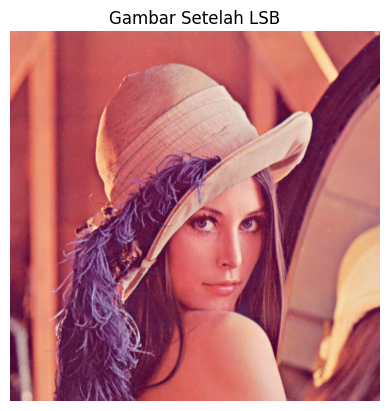

Pesan yang diekstrak dari gambar: d|&0%|0*6c#|8z c7c#zm8d*0*08*8p8$*cd,d+zez,|6z)8!cq zb**zzcq8jcazqz!**dkds*dcacl*n|6z)0y0/cq7)8=*ld1c#7q *9d08}0|0:7.*08w8$dacl0+zez?z=8=cbze|{cjc[db8m0]07c, 0e8mzq700x*2cdc+z)c2**8 dz7_c7|88p|{0|0_*78$*mza8+8= d(0i*m||7gza0jc/8=c\d18f8jzqzi|9|68$7ndi7g8(|g*lcazr 0ycjdm*l0,7l07zrdi0&zec+0yd\8l8m0e7r7m7!76*mclz58=z, d9z,83*ac[|%dfze0yz,dm0,09dsd+07*h0mc|zhzs


In [41]:
# Sisipkan pesan ke dalam gambar menggunakan LSB
message_4 = ascii_message
try:
    encoded_image_4 = embed_message(image_lena, message_4)
    # Tampilkan gambar yang telah disisipi pesan
    print("Gambar setelah LSB (dengan pesan):")
    display_image(encoded_image_4, "Gambar Setelah LSB")

    # Baca nilai RGB dari setiap piksel setelah LSB
    rgb_values_after = read_rgb_from_image(encoded_image_4)
    # print("Nilai RGB dari gambar setelah LSB:")
    # for rgb in rgb_values_after:
        # print(f"Koordinat: ({rgb[0]}, {rgb[1]}) - R: {rgb[2]}, G: {rgb[3]}, B: {rgb[4]}")

    # Baca bit LSB dari gambar yang telah disisipi pesan
    bits_after = read_bits_from_image(encoded_image_4)
    # print("Bit yang dibaca dari gambar setelah LSB (LSB dari tiap channel):")
    # print(bits_after)

    # Ekstrak pesan dari gambar yang telah disisipi pesan
    extracted_message = extract_message(encoded_image_4, len(message_4))
    print("Pesan yang diekstrak dari gambar:", extracted_message)

except ValueError as e:
    print(e)


In [42]:
extracted_message == message_4

True

In [43]:
psnr_value_4 = psnr(image_lena, encoded_image_4)
print(f"PSNR antara gambar asli dan encoded_image: {psnr_value_4} dB")

1458.0 0.00185394287109375
PSNR antara gambar asli dan encoded_image: 75.44984013557279 dB


# Test Capacity

In [44]:
786432 / 8

98304.0

In [45]:
98304/3

32768.0

In [46]:
messages = "abc" * 32768

print(image_lena.size)
print(image_lena.size[0] * image_lena.size[1] * 3)

(512, 512)
786432


In [47]:
new_ = embed_message(image_lena, messages)

In [48]:
extracted_message = extract_message(new_, len(messages))
print("Pesan yang diekstrak dari gambar:", len(extracted_message))

Pesan yang diekstrak dari gambar: 98304


In [49]:
messages == extracted_message

True

In [50]:
def embed_message(input_image_path, message, output_image_path):
    # Baca gambar input
    image = Image.open(input_image_path)

    # Konversi pesan ke dalam bit
    message_bits = message_to_bits(message)

    img_data = np.array(image)
    h, w, _ = img_data.shape

    # Hitung total kapasitas gambar dalam bit
    capacity = h * w * 3  # Setiap piksel memiliki 3 channel (RGB)

    # Cek apakah panjang bit pesan melebihi kapasitas gambar
    total_bits = len(message_bits)
    if total_bits > capacity:
        raise ValueError(f"Pesan terlalu panjang! Gambar hanya bisa menampung {capacity} bit, tapi pesan membutuhkan {total_bits} bit.")

    bit_idx = 0

    for i in range(h):
        for j in range(w):
            pixel = img_data[i, j]
            for k in range(3):  # Mengiterasi RGB
                if bit_idx < total_bits:
                    # Ganti bit LSB dari nilai channel dengan bit pesan
                    pixel[k] = (pixel[k] & ~1) | int(message_bits[bit_idx])
                    bit_idx += 1
            img_data[i, j] = pixel
            if bit_idx >= total_bits:
                break
        if bit_idx >= total_bits:
            break

    # Konversi kembali ke image dan simpan ke file output
    output_image = Image.fromarray(img_data)
    output_image.save(output_image_path)

    print(f"Gambar dengan pesan tersembunyi berhasil disimpan sebagai '{output_image_path}'.")

In [51]:
def calculate_mse(original, stego):
    return np.mean((original - stego) ** 2)

In [52]:
import cv2
import numpy as np

In [53]:
def calculate_psnr(target, ori_image=LENA_IMG):
    # Read images
    original = cv2.imread(ori_image)
    stego = cv2.imread(f'{target}')

    if original is None:
        raise ValueError(f"Failed to load original image from {ori_image}. Ensure the file exists and is a valid image format.")
    if stego is None:
        raise ValueError(f"Failed to load stego image from {target}. Ensure the file exists and is a valid image format.")

    # Calculate MSE using the separated function
    mse = calculate_mse(original, stego)
    if mse == 0:  # If images are identical
        return float('inf')

    # Calculate PSNR using the 10 log10 version
    max_pixel_value = 255.0
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    # print(f'PSNR: {psnr}')
    return psnr

In [54]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original, stego):
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    stego_gray = cv2.cvtColor(stego, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM
    ssim_value, _ = ssim(original_gray, stego_gray, full=True)
    return ssim_value

In [55]:
def calculate_stego_metrics(target, ori_image=LENA_IMG):
    # Read images
    original = cv2.imread(ori_image)
    stego = cv2.imread(f'{target}')

    if original is None:
        raise ValueError(f"Failed to load original image from {ori_image}. Ensure the file exists and is a valid image format.")
    if stego is None:
        raise ValueError(f"Failed to load stego image from {target}. Ensure the file exists and is a valid image format.")

    # Calculate metrics
    mse_value = calculate_mse(original, stego)
    psnr_value = calculate_psnr(target)
    ssim_value = calculate_ssim(original, stego)

    # Print results
    print(f'Metrics between original ({ori_image}) and stego image ({target}):')
    print(f'MSE: {mse_value}')
    print(f'PSNR: {psnr_value}')
    print(f'SSIM: {ssim_value}')

    return mse_value, psnr_value, ssim_value

In [56]:
messages = "abc" * 32768

In [57]:
embed_message(LENA_IMG, messages, 'lena_embedded.png')

Gambar dengan pesan tersembunyi berhasil disimpan sebagai 'lena_embedded.png'.


In [58]:
calculate_stego_metrics('lena_embedded.png')

Metrics between original (lena.png) and stego image (lena_embedded.png):
MSE: 0.5008494059244791
PSNR: 51.13373197889881
SSIM: 0.9972193619354888


(0.5008494059244791, 51.13373197889881, 0.9972193619354888)

## try other cover image

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Pappers

In [60]:
pappers_IMG = '/content/drive/MyDrive/stego/cover/pappers.tiff'

if not os.path.exists(pappers_IMG):
    raise FileNotFoundError(f"Image not found at {pappers_IMG}")

In [61]:
embed_message(pappers_IMG, messages, 'pappers_embedded.png')

Gambar dengan pesan tersembunyi berhasil disimpan sebagai 'pappers_embedded.png'.


In [62]:
calculate_stego_metrics('pappers_embedded.png')

Metrics between original (lena.png) and stego image (pappers_embedded.png):
MSE: 104.45763651529948
PSNR: 27.94140165711716
SSIM: 0.2562417304962291


(104.45763651529948, 27.94140165711716, 0.2562417304962291)

### PNG Pappers

In [68]:
pappers_IMG = '/content/drive/MyDrive/stego/cover/pappers.png'

if not os.path.exists(pappers_IMG):
    raise FileNotFoundError(f"Image not found at {pappers_IMG}")

In [69]:
embed_message(pappers_IMG, messages, 'pappers_embedded_2.png')

Gambar dengan pesan tersembunyi berhasil disimpan sebagai 'pappers_embedded_2.png'.


In [70]:
calculate_stego_metrics('pappers_embedded_2.png')

Metrics between original (lena.png) and stego image (pappers_embedded_2.png):
MSE: 104.45763651529948
PSNR: 27.94140165711716
SSIM: 0.2562417304962291


(104.45763651529948, 27.94140165711716, 0.2562417304962291)

### Airplane

In [63]:
airplane_IMG = '/content/drive/MyDrive/stego/cover/airplane.tiff'

if not os.path.exists(airplane_IMG):
    raise FileNotFoundError(f"Image not found at {airplane_IMG}")

In [64]:
embed_message(airplane_IMG, messages, 'airplane_embedded.png')

Gambar dengan pesan tersembunyi berhasil disimpan sebagai 'airplane_embedded.png'.


In [65]:
calculate_stego_metrics('airplane_embedded.png')

Metrics between original (lena.png) and stego image (airplane_embedded.png):
MSE: 104.38791910807292
PSNR: 27.944301205186104
SSIM: 0.3129461036981168


(104.38791910807292, 27.944301205186104, 0.3129461036981168)

### Couple

In [66]:
couple_IMG = '/content/drive/MyDrive/stego/cover/couple.tiff'

if not os.path.exists(couple_IMG):
    raise FileNotFoundError(f"Image not found at {couple_IMG}")

In [67]:
embed_message(couple_IMG, messages, 'couple_embedded.png')

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
calculate_stego_metrics('couple_embedded.png')